In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
# Load dataset
data = pd.read_csv('C:/Users/Vivek/Downloads/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv')
# Preprocess dataset
features = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']
data = data[features]
temperature = data['T (degC)'].values.reshape(-1, 1)
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [2]:
# Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

In [3]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=54)
# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [4]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout regularization
model.add(LSTM(units=32))
model.add(Dense(units=1))

C:\Users\Vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='mse')
# Train model
model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val))
# Evaluate model on validation set
val_loss = model.evaluate(X_val, y_val)

Epoch 1/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.9335 - val_loss: 0.8777
Epoch 2/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.8755 - val_loss: 0.8519
Epoch 3/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8582 - val_loss: 0.8414
Epoch 4/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.8486 - val_loss: 0.8366
Epoch 5/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.8415 - val_loss: 0.8268
Epoch 6/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.8344 - val_loss: 0.8312
Epoch 7/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8359 - val_loss: 0.8300
Epoch 8/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.8306 - val_loss: 0.8224
Epoch 9/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.8272 - val_loss: 0.8170
Epoch 10/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.8213 - val_loss: 0.8285
Epoch 11/12
10514/10514 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.8248 - val_loss: 0.81

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_val = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r_squared = r2_score(y_val, y_pred_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

performance_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error','RMSE', 'R-squared'],
    'Value': [mae, mse,rmse, r_squared]
})
print(performance_table)

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
                Metric     Value
0  Mean Absolute Error  0.691067
1   Mean Squared Error  0.811908
2                 RMSE  0.901059
3            R-squared  0.188404


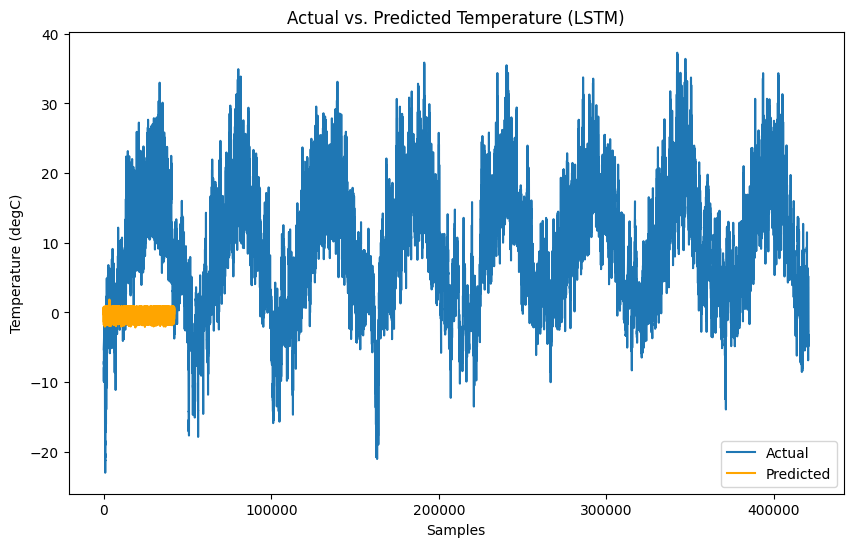

In [14]:
# Plot actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(temperature, label='Actual')
plt.plot(y_pred_val, label='Predicted',color='orange')
plt.xlabel('Samples')
plt.ylabel('Temperature (degC)')
plt.title('Actual vs. Predicted Temperature (LSTM)')
plt.legend()
plt.show()